In [2]:
import requests
import markettime as mt
from datetime import datetime
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import numpy as np

In [4]:
r = requests.get('https://api.cryptowat.ch/markets/kraken/btceur/ohlc', 
                 params = {'after': mt.get_nyse_open_timestamp(date = datetime(2021,12,7))})

In [5]:
header = ["CloseTime", "OpenPrice", "HighPrice", "LowPrice", "ClosePrice", "Volume", "QuoteVolume"]

In [6]:
t = pd.DataFrame(r.json()['result']['60'], columns = header)

In [11]:
d = t.set_index("CloseTime").diff().dropna()

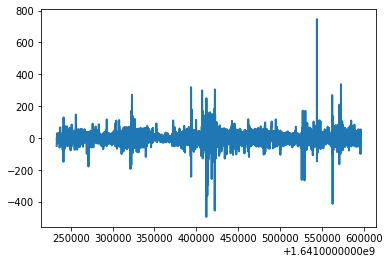

In [13]:
fig, ax = plt.subplots()

ax.plot(d.index, d.ClosePrice, linewidth=2.0)

plt.show()

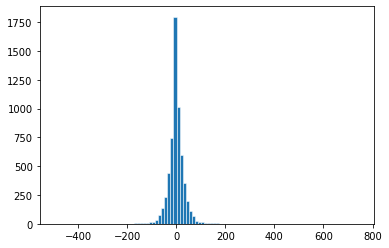

In [14]:
# make data
# plot:
fig, ax = plt.subplots()

ax.hist(d.ClosePrice, bins=100, linewidth=0.5, edgecolor="white")

plt.show()

In [19]:
t.ClosePrice.median()

39141.8

In [26]:
import random

[4165, 9398, 9373, 8938, 2872, 7014, 984, 5411, 5022, 4050]

In [24]:
import functools

In [46]:
_default_sampler = functools.partial(pd.Series.sample,
                                     n = 100,
                                     replace = True)

def bootstrap_estimate(x,
                       random_state = 350,
                       estimator = pd.Series.median,
                       sampler = _default_sampler):
    sample = sampler(x, random_state = random_state)
    estimate = estimator(sample)
    return estimate

def bootstrap_replicates_serial(x,
                                R = 100,
                                random_states = None,
                                estimator = pd.Series.median,
                                sampler = _default_sampler):
    if random_states is None:
        random_states = random.sample(range(1,R*10), R)
        
    replicates = []
    for random_state in random_states:
        estimate = bootstrap_estimate(x = x,
                                      random_state = random_state,
                                      estimator = estimator,
                                      sampler = sampler)
                                     
        replicates.append(estimate)
    return replicates

def bootstrap_replicates_parallel(x,
                                  R = 100,
                                  estimator = pd.Series.median,
                                  sampler = _default_sampler):
    replicates = []
    random_states = random.sample(range(1,R*10), R)
    for random_state in random_states:
        estimate = bootstrap_estimate(x = x,
                                      random_state = random_state,
                                      estimator = estimator,
                                      sampler = sampler)
                                     
        replicates.append(estimate)
    return replicates
    
def bootstrap_replicates(x, R = 100, estimator = pd.Series.median, sampler = _default_sampler,
                         parallel = False, workers = 10):
    with concurrent.futures.ProcessPoolExecutor(max_workers = workers) as executor:
        
    

    

In [47]:
r = bootstrap_replicates_serial(x = d.ClosePrice)

In [50]:
import concurrent.futures